In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from geopy import distance
import networkx as nx

# Part 1

In [13]:
# Import Campus Paths
# Each row corresponds to a walkway between buildings on campus. There is a start building, an end building, 
# the latitudes and longitudes of the start and end buildings, and a distance in meters.

header_list = ["start", "end", "start_lat", "start_long", "end_lat", "end_long",  "dist"]
buildings_df = pd.read_csv('data/campus_paths.txt', sep=" ", header=None, names=header_list)
buildings_df.head()

,start,end,start_lat,start_long,end_lat,end_long,dist
0,Abel_Wolman_House,Steinwald_House,39.327692,-76.617195,39.327575,-76.617256,13.980812
1,Ames_Hall,Krieger_Hall,39.328583,-76.620791,39.328616,-76.619988,69.154715
2,AMR3,AMR2,39.331919,-76.619787,39.331473,-76.619129,75.306591
3,AMR1,AMR2,39.330674,-76.618483,39.331473,-76.619129,104.854241
4,AMR2,AMR3,39.331473,-76.619129,39.331919,-76.619787,75.306591


In [3]:
# This calculates the distance based on geospatial coordinates and compares it to
# listed distance in the dataframe. Should be very close.

def compare_dist(i):
    expected = buildings_df["dist"][i]
    
    c1 = np.array([buildings_df["start_lat"][i], buildings_df["start_long"][i]])
    c2 = np.array([buildings_df["end_lat"][i], buildings_df["end_long"][i]])

    actual = distance.distance(c1, c2).meters
    print(expected, actual)

In [4]:
# Create undirected graph with the buildings as nodes walkwalys between buildings as edges
# Edges have attributes: "start" and "end" which are the buildings the edge connects
# Edge attribute "dist" is the distance between buildings

G=nx.from_pandas_edgelist(buildings_df, 'start', 'end', 'dist') 

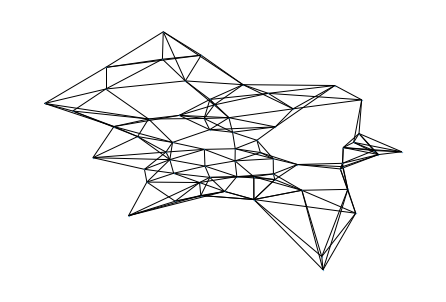

In [5]:
# Make a list of the lattitudes and longitudes of all the buildings
# Draw the map of campus where the nodes' (x,y) positions are the latitude and logngitudes

pos = {}

for n in G.nodes():
    l1 = buildings_df.loc[buildings_df['start'] == n].index.tolist()
    l2 = buildings_df.loc[buildings_df['end'] == n].index.tolist()
    
    if len(l1) > 0:
        coords = (buildings_df['start_long'][l1[0]], buildings_df['start_lat'][l1[0]])
    else:
        coords = (buildings_df['end_long'][l2[0]], buildings_df['end_lat'][l2[0]])
    
    pos[n] = (coords)
    
nx.set_node_attributes(G, pos, "pos")
nx.draw(G, pos, node_size = .1, with_labels = False)

In [12]:
# Import Room Data
# Each row corresponds to a room in a building.
# The building, room number, capacity of the room, and the school to which the building belongs is listed each row

header_list = ["building", "room_num", "capacity", "School"]
rooms_df = pd.read_csv('data/available_rooms.txt', sep=" ", header=None, names=header_list)
rooms_df.head()

,building,room_num,capacity,School
0,Ames_Hall,218,41,AS
1,Ames_Hall,234,60,AS
2,Bloomberg_Hall,168,48,AS
3,Bloomberg_Hall,172,20,AS
4,Bloomberg_Hall,176,34,AS


In [7]:
# Print a list of all buildings with available rooms and the buildings on campus

targets = rooms_df.building.unique()
sources = G.nodes()
print("Buildings with available rooms: \n", targets, "\n")
print("All buildings: \n", sources)

Buildings with available rooms: 
 ['Ames_Hall' 'Bloomberg_Hall' 'Croft_Hall' 'Gilman_Hall' 'Greenhouse'
 'Hodson_Hall' 'Krieger_Hall' 'Latrobe_Hall' 'Maryland_Hall'
 'Mergenthaler_Hall' 'Mudd_Hall' 'Olin_Hall' 'Remsen_Hall' 'Shaffer_Hall'
 'Shriver_Hall'] 

All buildings: 
 ['Abel_Wolman_House', 'Steinwald_House', 'Ames_Hall', 'Krieger_Hall', 'AMR3', 'AMR2', 'AMR1', 'Baltimore_Museum_of_Art', 'Shriver_Hall', 'Barnes_&_Noble', 'Charles_Commons', 'Barton_Hall', 'Hackerman_Hall', 'Bloomberg_Hall', 'Steven_Muller_Bldg.', 'BMA_Sculpture_Garden', 'Bradford_Apts.', 'Brody_Learning_Commons', 'Merrick_Barn', 'Bunting_Meyerhoff_Interfaith_and_Community_Service_Center', 'Rogers_House', 'Chemistry_Bldg.', 'Macaulay_Hall', 'Clark_Hall', 'Hodson_Hall', 'Croft_Hall', 'Shaffer_Hall', 'Dell_House', 'Education_Building', 'Dunning_Hall', 'Garland_Hall', 'Gatehouse', 'Power_Plant', 'Gilman_Hall', 'Glass_Pavilion', 'Levering_Hall', 'Greenhouse', 'Nichols_House', 'Homewood_Apts.', 'Smokler_Center_for_Jewish

In [8]:
# Input a random starting point of your destination, and it will find the closest available building with classrooms
# Output is a list of tuples, where the first argument is the name of the building, the second it the total distance between the
# starting building and that building, and the third is a list of buildings that forms the path.

def Sort_Tuple(tup): 
    tup.sort(key = lambda x: x[1]) 
    return tup 

def find_closest_rooms(s):
    targets_paths = []

    for t in targets:
        path = nx.shortest_path(G, source=s, target=t, weight='dist')
        length = nx.shortest_path_length(G, s, t, weight='dist')
        targets_paths.append((t, length, path))
        
    sorted_target_paths = Sort_Tuple(targets_paths)
    
    return sorted_target_paths

In [10]:
# Example output from previous function

s = 'Dunning_Hall'
closest_rooms = find_closest_rooms(s)

for closest in closest_rooms:
    print(closest)

('Mudd_Hall', 80.35736133574507, ['Dunning_Hall', 'Mudd_Hall'])
('Mergenthaler_Hall', 81.10789369129459, ['Dunning_Hall', 'Mergenthaler_Hall'])
('Remsen_Hall', 84.02193188902837, ['Dunning_Hall', 'Remsen_Hall'])
('Krieger_Hall', 178.59753762336817, ['Dunning_Hall', 'Remsen_Hall', 'Krieger_Hall'])
('Gilman_Hall', 191.82398724921518, ['Dunning_Hall', 'Mergenthaler_Hall', 'Gilman_Hall'])
('Ames_Hall', 247.7522530701554, ['Dunning_Hall', 'Remsen_Hall', 'Krieger_Hall', 'Ames_Hall'])
('Maryland_Hall', 248.41793742510214, ['Dunning_Hall', 'Remsen_Hall', 'Krieger_Hall', 'Maryland_Hall'])
('Greenhouse', 276.9690029301818, ['Dunning_Hall', 'Mergenthaler_Hall', 'Gilman_Hall', 'Greenhouse'])
('Latrobe_Hall', 322.0685121100172, ['Dunning_Hall', 'Remsen_Hall', 'Krieger_Hall', 'Maryland_Hall', 'Latrobe_Hall'])
('Shaffer_Hall', 338.50480386590795, ['Dunning_Hall', 'Remsen_Hall', 'Krieger_Hall', 'Maryland_Hall', 'Shaffer_Hall'])
('Croft_Hall', 348.38111985315487, ['Dunning_Hall', 'Remsen_Hall', 'Kriege